In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import json_normalize
import pandas as pd


In [2]:
#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

In [5]:
match_id_required = 7530
file_name=str(match_id_required)+'.json'
#Load in all match events 
import json
with open('Statsbomb/data/events/'+file_name) as data_file:
    #print (mypath+'events/'+file)
    data = json.load(data_file)

#get the nested structure into a dataframe 
#store the dataframe in a dictionary with the match id as key (remove '.json' from string)
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])

#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

In [7]:
from statsbombpy import sb

sb.competitions()


credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2021-05-19T08:38:06.515138,2021-05-19T08:38:06.515138
1,16,1,Europe,Champions League,male,2017/2018,2021-01-23T21:55:30.425330,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [10]:
#world_cup = sb.matches(competition_id=43, season_id=3)
world_cup = sb.competition_events(country="International",season='2018', division='FIFA World Cup')

credentials were not supplied. open data access only
credentials were not supplied. open data access onlycredentials were not supplied. open data access onlycredentials were not supplied. open data access onlycredentials were not supplied. open data access only



credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

In [11]:
shots = world_cup.loc[world_cup["type"] == 'Shot']

mbappe_shots = shots.loc[shots["player"] == "Kylian Mbappé Lottin"]

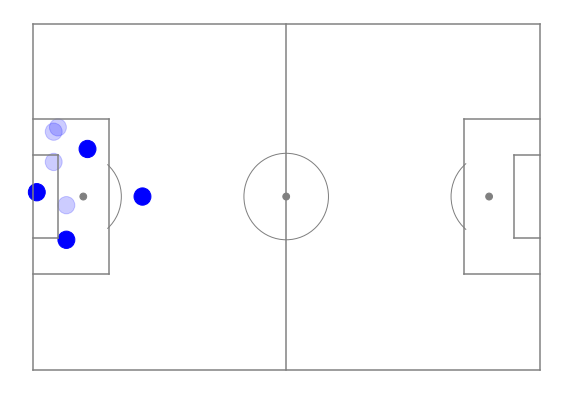

In [13]:
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,shot in mbappe_shots.iterrows():
    goal=shot['shot_outcome']=='Goal'
        
    x=shot['location'][0]
    y=shot['location'][1]

    circleSize=2

    if goal:
        shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
    else:
        shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
        shotCircle.set_alpha(.2)

    ax.add_patch(shotCircle)
fig.set_size_inches(10, 7)
fig.savefig('Output/ejercicios/asigment_mbappe_shots.pdf', dpi=100) 


In [14]:
shots[['player','shot_outcome']]

,player,shot_outcome
199389,Mathias Jattah-Njie Jørgensen,Goal
199390,Mario Mandžukić,Goal
199391,Ivan Perišić,Blocked
199392,Ivan Perišić,Blocked
199393,Christian Dannemann Eriksen,Blocked
...,...,...
201090,Kieran Trippier,Off T
201091,Wahbi Khazri,Blocked
201092,Naïm Sliti,Off T
201093,Ashley Young,Off T


In [16]:
shoots_total = shots['player'].value_counts().sort_index()
goals = shots.loc[shots["shot_outcome"] == "Goal"]["player"].value_counts().sort_index()

df1 = pd.DataFrame(goals)
df2 = pd.DataFrame(shoots_total)
#accurracy
df3 = pd.DataFrame(goals / shoots_total)

df = pd.merge(df1,df3, left_index=True, right_index=True)
df = pd.merge(df,df2, left_index=True, right_index=True)
df.columns = ['goals','% accuracy','shots']
df = df.loc[df["goals"] > 3]
df = df.sort_values(by=['% accuracy', 'goals'], ascending=False).dropna().to_csv("Output/ejercicios/shots.csv", sep=";")    
    

In [17]:
dribbles = world_cup.loc[world_cup["type"] == 'Dribble']

mbappe_dribbles = dribbles.loc[dribbles["player"] == "Kylian Mbappé Lottin"]


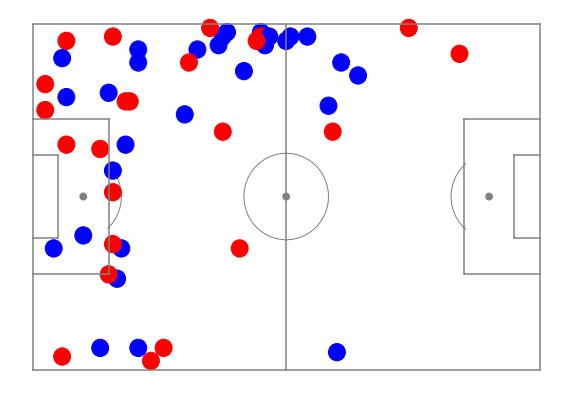

In [19]:
# if dribble was complete the circle is blue, otherwise is red
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,driblle in mbappe_dribbles.iterrows():
    outcome=driblle['dribble_outcome']
        
    x=driblle['location'][0]
    y=driblle['location'][1]

    circleSize=2

    if outcome == "Complete":
        shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
    else:
        shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="red")      

    ax.add_patch(shotCircle)
fig.set_size_inches(10, 7)
fig.savefig('Output/ejercicios/asigment_mbappe_dribbles.pdf', dpi=100) 


In [22]:
driblles_total = dribbles['player'].value_counts().sort_index()
dribbles_complete = dribbles.loc[dribbles["dribble_outcome"] == "Complete"]["player"].value_counts().sort_index()

df1 = pd.DataFrame(dribbles_complete)
df2 = pd.DataFrame(dribbles_complete / driblles_total)

df = pd.merge(df1,df2, left_index=True, right_index=True)
df.columns = ['total','% right dribbles']
df = df.loc[df["total"] > 17]
df.sort_values(by=['% right dribbles', 'total'], ascending=False).dropna().to_csv("Output/ejercicios/total_dribbles.csv")
    
    